# Idea and Data
The idea is with Machine Learning to predict if a patient has a breast cancer. This is a typical classification problem. The idea is to work with SVM algorithm which is supervised learning. I will try both supervised with SVM and other algorithms and unsupervised with neural networks using Keras.

## Data Exploration and some Preprocessing

In [2]:
# Importing libraries for basic manipulation of data and working with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# Reading the data from the csv file and storing it in a dataframe
df = pd.read_csv('./breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
# I don't need the id of the patient so I will drop that column
df = df.drop(['id'], axis=1)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
# I would also like to encode the diagnosis column which is basically the class here and I want to change the position of the class column to be the last column
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
new_cols = df.columns.tolist()
new_cols[0], new_cols[-1] = new_cols[-1], new_cols[0]
df = df[new_cols]
df.head(10)

,fractal_dimension_worst,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,0.11890,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,1
1,0.08902,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,1
2,0.08758,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,1
3,0.17300,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,1
4,0.07678,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,1
5,0.12440,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,1
6,0.08368,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,1
7,0.11510,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,1
8,0.10720,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,1
9,0.20750,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,1


In [6]:
# To see if we have some missing values in the dataframe or NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fractal_dimension_worst  569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Basic statistics of the dataframe
df.describe()

,fractal_dimension_worst,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.083946,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.372583
std,0.018061,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.483918
min,0.055040,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.000000
25%,0.071460,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.000000
50%,0.080040,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.000000
75%,0.092080,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,1.000000
max,0.207500,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,1.000000


## Correlation

<AxesSubplot:>

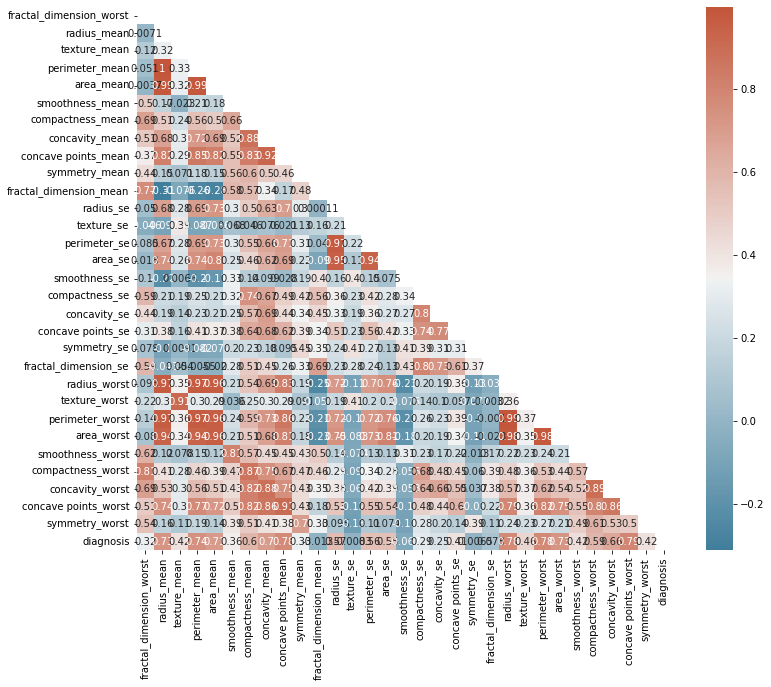

In [8]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, mask=mask, cmap=cmap)

## Train, Test Data

In [9]:
# Import the train_test_split function from sklearn.model_selection and to have better values I can use standard scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# X is the dataframe without the diagnosis column and y is the diagnosis column(class column)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [11]:
# Doing standard scaler on the train data
scl = StandardScaler()
X = scl.fit_transform(X)

In [12]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## Training, Testing, Validating

In [25]:
# Importing libraries for the model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

### Neural Networks

In [26]:
# The model will be a sequential model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [15]:
# Compiling the model, adam is the optimizer and binary_crossentropy is the loss function(because binary classification problem) and the metric is accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Training the model
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 8ms/step - loss: 0.5439 - accuracy: 0.7648 - val_loss: 0.4188 - val_accuracy: 0.8860
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8747 - val_loss: 0.2875 - val_accuracy: 0.9123
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9187 - val_loss: 0.2137 - val_accuracy: 0.9298
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9297 - val_loss: 0.1725 - val_accuracy: 0.9386
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9429 - val_loss: 0.1426 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9538 - val_loss: 0.1245 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.1061 - val_accuracy: 0.9386
Epoch 8/100
1

In [17]:
# Lets see the confusion matrix and classification report
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])
print(classification_report(y_test, y_final))
print(confusion_matrix(y_test, y_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.98      0.98      0.98        46

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[67  1]
 [ 1 45]]


When working with NN I got a near perfect result

## Classification
Because I lost the labels and I need those for the classification I need to get "new" X and y. I will use cross val, because the dataset is small 

In [18]:
X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

### Logistical Regression

In [20]:
# Training the model
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=10))

[0.93478261 0.89130435 0.95652174 0.91304348 1.         0.91111111
 0.93333333 1.         0.97777778 0.91111111]


In [21]:
# Lets see the confusion matrix and classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.96      0.96      0.96        46

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[66  2]
 [ 2 44]]


### SVM

In [22]:
# Training the model
model = SVC(kernel='linear', gamma=0.1, C=10)
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=10))

[0.95652174 0.93478261 0.97826087 0.91304348 1.         0.95555556
 0.95555556 0.95555556 0.93333333 0.93333333]


In [23]:
# Lets see the confusion matrix and classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.96      0.98      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[66  2]
 [ 1 45]]


### XGBoost

In [27]:
# Training the model
model = XGBClassifier(learning_rate=0.1, n_estimators=100,use_label_encoder=False,eval_metric='mlogloss')
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=10))

[0.97826087 0.95652174 1.         0.93478261 0.97826087 0.93333333
 0.97777778 0.97777778 0.95555556 0.97777778]


In [28]:
# Lets see the confusion matrix and classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.95      0.91      0.93        46

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[66  2]
 [ 4 42]]
